*Modelling Biological systems*

*Celia Sánchez and Lucía Chacón*

# Modelling the time evolution of COVID-19

### 1. Computing the time delay

For the following section we have proceeded on the basis of Lisphilar Notebook in Kaggle: [COVID-19 data with SIR model](https://www.kaggle.com/lisphilar/covid-19-data-with-sir-model/notebook). We have used the dataset "COVID19_line_list_data.csv", a line list that contains key information about some cases in the outbreak around the world. This information is used to compute the median value of the incubation period, or latent period, and the waiting time for confirmation, in days.  

Please follow these instructions after executing the code:
1. Open your Anaconda Prompt console. 
2. Execute: `conda install git pip`.
3. Execute: `pip install git+https://github.com/lisphilar/covid19-sir#egg=covsirphy`. 

In [13]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sympy
from scipy.integrate import odeint
import math as m
from covsirphy import select_area #function created by Lisphilar to select an area from the datasets

In [3]:
#The following code has been adapted from the Lisphilar Notebook to be more readable:

linelist_raw = pd.read_csv("COVID19_line_list_data.csv")
df = linelist_raw.loc[:, ~linelist_raw.columns.str.startswith("Unnamed:")]
df = df.drop(["id", "case_in_country", "summary", "source", "link"], axis=1)

# Date
case_date_dict = {
    "reporting date": "Confirmed_date",
    "exposure_start": "Exposed_date",
    "exposure_end": "Quarantined_date",
    "hosp_visit_date": "Hospitalized_date",
    "symptom_onset": "Onset_date",
    "death": "Deaths_date",
    "recovered": "Recovered_date"    
}
df["death"] = df["death"].replace({"0": "", "1": ""})
df["recovered"] = df["recovered"].replace({"0": "", "1": "", "12/30/1899": "12/30/2019"})
for (col, _) in case_date_dict.items():
    df[col] = pd.to_datetime(df[col])
df = df.rename(case_date_dict, axis=1)

# Location
df["Country"] = df["country"].fillna("-")
df["Province"] = df["location"].fillna("-")
df["Province"] = df[["Country", "Province"]].apply(lambda x: "-" if x[0] == x[1] else x[1], axis=1)

# Personal
df["Gender"] = df["gender"].fillna("-").str.capitalize()
df["Age"] = df["age"].fillna(df["age"].median()).astype(np.int64) 
df["From_Wuhan"] = df["from Wuhan"]
df["To_Wuhan"] = df["visiting Wuhan"]

# Medical
df["Events"] = df["symptom"].fillna("-")

# Order of columns
linelist_df = df.loc[
    :,
    [
        "Country", "Province",
        "Exposed_date", "Onset_date", "Hospitalized_date", "Confirmed_date", "Quarantined_date", "Deaths_date", 
        "Recovered_date",
        "Events",
        "Gender", "Age", "From_Wuhan", "To_Wuhan"
    ]
]

In [4]:
#Here is the specific data of this dataset refered to Spain

period_df_spain = select_area(linelist_df, group=None, places=[("Spain", None)])
period_df_spain = period_df_spain.loc[:, ["Exposed_date", "Onset_date", "Confirmed_date"]]
period_df_spain["Latent [min]"] = (period_df_spain["Onset_date"] - period_df_spain["Exposed_date"]).dt.total_seconds() / 60
period_df_spain["Waiting [min]"] = (period_df_spain["Confirmed_date"] - period_df_spain["Onset_date"]).dt.total_seconds() / 60
period_df_spain["Latent [day]"] = period_df_spain["Latent [min]"] / 60 / 24
period_df_spain["Waiting [day]"] = period_df_spain["Waiting [min]"] / 60 / 24
period_df_spain["Latent + Waiting [day]"] = period_df_spain["Latent [day]"] + period_df_spain["Waiting [day]"]
period_df_spain

,Exposed_date,Onset_date,Confirmed_date,Latent [min],Waiting [min],Latent [day],Waiting [day],Latent + Waiting [day]
996,NaT,NaT,2020-01-31,NaN,NaN,NaN,NaN,NaN
997,NaT,NaT,2020-02-10,NaN,NaN,NaN,NaN,NaN
998,NaT,NaT,2020-02-24,NaN,NaN,NaN,NaN,NaN
999,NaT,NaT,2020-02-25,NaN,NaN,NaN,NaN,NaN
1000,2020-02-12,NaT,2020-02-25,NaN,NaN,NaN,NaN,NaN
1001,NaT,NaT,2020-02-25,NaN,NaN,NaN,NaN,NaN
1002,NaT,NaT,2020-02-25,NaN,NaN,NaN,NaN,NaN
1003,NaT,NaT,2020-02-26,NaN,NaN,NaN,NaN,NaN
1004,NaT,NaT,2020-02-26,NaN,NaN,NaN,NaN,NaN
1005,NaT,NaT,2020-02-26,NaN,NaN,NaN,NaN,NaN


Unfortunately, the dataset did not provide us with the latent period and waiting time for the reported cases from Spain. So, we have based our results on the cases that do provide this information (cases from China mainly). 

In [5]:
#We do not filter by country
period_df = select_area(linelist_df, group=None)
period_df = period_df.loc[:, ["Exposed_date", "Onset_date", "Confirmed_date"]]
period_df["Latent [min]"] = (period_df["Onset_date"] - period_df["Exposed_date"]).dt.total_seconds() / 60
period_df["Waiting [min]"] = (period_df["Confirmed_date"] - period_df["Onset_date"]).dt.total_seconds() / 60
period_df["Latent [day]"] = period_df["Latent [min]"] / 60 / 24
period_df["Waiting [day]"] = period_df["Waiting [min]"] / 60 / 24
period_df["Latent + Waiting [day]"] = period_df["Latent [day]"] + period_df["Waiting [day]"]
period_df.dropna(axis=0).tail()

,Exposed_date,Onset_date,Confirmed_date,Latent [min],Waiting [min],Latent [day],Waiting [day],Latent + Waiting [day]
948,2020-01-25,2020-02-24,2020-02-24,43200.0,0.0,30.0,0.0,30.0
949,2020-01-25,2020-02-04,2020-02-24,14400.0,28800.0,10.0,20.0,30.0
957,2020-01-25,2020-02-12,2020-02-26,25920.0,20160.0,18.0,14.0,32.0
958,2020-01-25,2020-02-17,2020-02-26,33120.0,12960.0,23.0,9.0,32.0
1084,2020-02-15,2020-02-17,2020-02-25,2880.0,11520.0,2.0,8.0,10.0


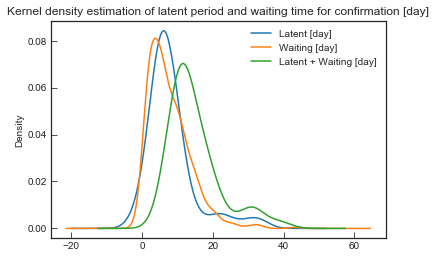

,count,mean,std,min,25%,50%,75%,max
Latent [day],83.0,8.180723,6.786185,-2.0,4.0,6.0,9.0,34.0
Waiting [day],563.0,7.682060,5.890473,0.0,3.0,6.0,11.0,43.0
Latent + Waiting [day],83.0,14.819277,7.305435,5.0,10.0,13.0,17.5,40.0


In [6]:
cols = ["Latent [day]", "Waiting [day]", "Latent + Waiting [day]"]
period_df[cols].plot.kde()
plt.title("Kernel density estimation of latent period and waiting time for confirmation [day]")
plt.show()
period_df[cols].describe().T

In [12]:
latent_period = period_df["Latent [min]"].median()
waiting_time = period_df["Waiting [min]"].median()
latent_waiting_day = period_df["Latent + Waiting [day]"].median()
print("An infected individual is not counted in the epidemiological reports after",int(latent_waiting_day), 
      "days from the exposition to the virus.")

An infected individual is not counted in the epidemiological reports after 13 days from the exposition to the virus.


### 2. The Lockdown Model. 

For this section we have created a Population Pyramid of Spain in 2019 until the age of 95. The data is extracted from the [Instituto Nacional de Estadística](https://www.ine.es/jaxi/Tabla.htm?path=/t20/e245/p08/&file=02002.px&L=0). 

In [16]:
#population pyramid database of Spain in 2019 until 95 years old
data = pd.ExcelFile('piramide_esp.xls')
pyramid= data.parse(0) 
age = pyramid['Age']
ind = pyramid['Individuals']
pyramid_df = pd.DataFrame(data=ind,index=age)

We have hypothesized a Mobility Mapping. This is an estimation of the number of days per week an individual goes out of home depending on age. We have follow the same criteria of three reasons to go outside (School, Work, Others) used in Lisphilar Notebook but we have changed the hypothesis. This information is combined with the Population pyramid weights to obtain the factor describing the modifications of the spread behaviour of the epidemic.  

In [17]:
_period_of_life_list = [
    "nursery", "nursery school", "elementary school", "middle school",
    "high school", "university/work", "work", "work", "work", "work",
    "retired", "retired", "retired"
]
df = pd.DataFrame(
    {
        "Age_first": [0, 3, 6, 11, 14, 19, 26, 36, 46, 56, 66, 76, 86],
        "Age_last": [2, 5, 10, 13, 18, 25, 35, 45, 55, 65, 75, 85, 95],
        "Period_of_life": _period_of_life_list,
        "Days": [3, 4, 5, 6, 6, 6, 6, 6, 6, 6, 7, 6, 5]
    }
)

df["Types"] = df["Period_of_life"].replace(
    {
        "nursery": "school",
        "nursery school": "school",
        "elementary school": "school",
        "middle school": "school",
        "high school": "school",
        "university/work": "school/work"
    }
)
df["School"] = df[["Types", "Days"]].apply(lambda x: x[1] if "school" in x[0] else 0, axis=1)
df["Office"] = df[["Types", "Days"]].apply(lambda x: x[1] if "work" in x[0] else 0, axis=1)
df["Others"] = df["Days"] - df[["School", "Office"]].sum(axis=1)
df.loc[df["Others"] < 0, "Others"] = 0
df.loc[df.index[1:5], "School"] -= 1
df.loc[df.index[1:5], "Others"] += 1
df.loc[df.index[5], ["School", "Office", "Others"]] = [3, 3, 1]
df[["School", "Office", "Others"]] = df[["Days", "School", "Office", "Others"]].apply(
    lambda x: x[1:] / sum(x[1:]) * x[0], axis=1
).astype(np.int64)
df.loc[df.index[6:10], "Others"] += 1
df = df.drop(["Days", "Types"], axis=1)
# Show dataset
_out_df = df.copy()
_out_df

,Age_first,Age_last,Period_of_life,School,Office,Others
0,0,2,nursery,3,0,0
1,3,5,nursery school,3,0,1
2,6,10,elementary school,4,0,1
3,11,13,middle school,5,0,1
4,14,18,high school,5,0,1
5,19,25,university/work,2,2,0
6,26,35,work,0,6,1
7,36,45,work,0,6,1
8,46,55,work,0,6,1
9,56,65,work,0,6,1


In [22]:
#we are going to compute the weights 
df = pyramid_df.cumsum()
columns = df.columns[:]
df = pd.merge(_out_df, pyramid_df, left_on="Age_last", right_on="Age", how="left")
_first = df.loc[df.index[0], columns]
df.loc[df.index[0], columns] = _first
df[columns] = df[columns].apply(lambda x: x / x.sum(), axis=0)
series = df["Individuals"]
df = df.iloc[:, :6]
df["Portion"] = series
eg_out_df = df.copy()
eg_out_df

,Age_first,Age_last,Period_of_life,School,Office,Others,Portion
0,0,2,nursery,3,0,0,0.068092
1,3,5,nursery school,3,0,1,0.078674
2,6,10,elementary school,4,0,1,0.083213
3,11,13,middle school,5,0,1,0.083213
4,14,18,high school,5,0,1,0.077570
5,19,25,university/work,2,2,0,0.085717
6,26,35,work,0,6,1,0.116654
7,36,45,work,0,6,1,0.127553
8,46,55,work,0,6,1,0.109117
9,56,65,work,0,6,1,0.080120


### gs before the lockdown
Using the products between population-weights and outing events (days per week susceptible people goes out) we have defined the gs factor. The `gs_before` factor is describing the mobility before the State of Emergency. 

In [23]:
gs_before = (eg_out_df[["School", "Office", "Others"]].sum(axis=1) * eg_out_df["Portion"]).sum()
gs_before

5.867755812117249

### gs after the lockdown: first 2 weeks
The `gs_after1` factor is describing the mobility between day 43 and 55:
- Schools are closed. 
- 50% of people works remotely. 
- Adults will go out 4-6 days for other reasons instead of going to school/office.
- Underage children mobility is considered as exceptions. 

In [28]:
df = eg_out_df.copy()
df["School"] = 0
df["Office"] *= 0.5
df["Others"] = 0
df.loc[df["Age_first"]<18,"Others"]+=1.5
df.loc[df["Age_first"]>18,"Others"]+=5
df.loc[df["Age_first"]>25,"Others"]=4
df.loc[df["Age_first"]>65,"Others"]+=2
eg_out_df_after = df.copy()
eg_out_df_after
df = eg_out_df_after.copy()
gs_after1 = (df[["School", "Office", "Others"]].sum(axis=1) * df["Portion"]).sum()
print("The value for gs_after1 is", gs_after1, " and the ratio between gs after and before is", (gs_after1/gs_before))
df

The value for gs_after1 is 4.675017778971873  and the ratio between gs after and before is 0.7967301177253655


,Age_first,Age_last,Period_of_life,School,Office,Others,Portion
0,0,2,nursery,0,0.0,1.5,0.068092
1,3,5,nursery school,0,0.0,1.5,0.078674
2,6,10,elementary school,0,0.0,1.5,0.083213
3,11,13,middle school,0,0.0,1.5,0.083213
4,14,18,high school,0,0.0,1.5,0.077570
5,19,25,university/work,0,1.0,5.0,0.085717
6,26,35,work,0,3.0,4.0,0.116654
7,36,45,work,0,3.0,4.0,0.127553
8,46,55,work,0,3.0,4.0,0.109117
9,56,65,work,0,3.0,4.0,0.080120


### gs after the lockdown: third week
The `gs_after2` factor is describing the mobility between day 55 and 65:
- Schools are closed. 
- 50% of people works remotely. 
- Adults will go out 4 days for other reasons instead of going to school/office (more awareness).
- Children under 14 can go out. 

In [29]:
df = eg_out_df.copy()
df["School"] = 0
df["Office"] *= 0.5
df["Others"] = 0
df.loc[df["Age_first"]>18, "Others"]+=4
df.loc[df["Age_first"]<14, "Others"]+=5
eg_out_df_after = df.copy()
df = eg_out_df_after.copy()
gs_after2 = (df[["School", "Office", "Others"]].sum(axis=1) * df["Portion"]).sum()
print("The value for gs_after2 is", gs_after2, " and the ratio between gs after and before is", (gs_after2/gs_before))
df

The value for gs_after2 is 5.38895991645119  and the ratio between gs after and before is 0.9184022118511956


,Age_first,Age_last,Period_of_life,School,Office,Others,Portion
0,0,2,nursery,0,0.0,5,0.068092
1,3,5,nursery school,0,0.0,5,0.078674
2,6,10,elementary school,0,0.0,5,0.083213
3,11,13,middle school,0,0.0,5,0.083213
4,14,18,high school,0,0.0,0,0.077570
5,19,25,university/work,0,1.0,4,0.085717
6,26,35,work,0,3.0,4,0.116654
7,36,45,work,0,3.0,4,0.127553
8,46,55,work,0,3.0,4,0.109117
9,56,65,work,0,3.0,4,0.080120


### gs after the lockdown:  last month
The `gs_after3` factor is describing the mobility after day 65:
- Schools are closed. 
- 50% of people works remotely. 
- Adults will go out 4 days for other reasons instead of going to school/office.
- Children under 14 can go out, and also teenagers (14-18 years old).  

In [30]:
df = eg_out_df.copy()
df["School"] = 0
df["Office"] *= 0.5
df["Others"] = 0
df.loc[df["Age_first"]>18, "Others"]+=4
df.loc[df["Age_first"]<18, "Others"]+=5
eg_out_df_after = df.copy()
df = eg_out_df_after.copy()
gs_after3 = (df[["School", "Office", "Others"]].sum(axis=1) * df["Portion"]).sum()
print("The value for gs_after3 is", gs_after3, " and the ratio between gs after and before is", (gs_after3/gs_before))
df

The value for gs_after3 is 5.776811711636366  and the ratio between gs after and before is 0.9845010420690857


,Age_first,Age_last,Period_of_life,School,Office,Others,Portion
0,0,2,nursery,0,0.0,5,0.068092
1,3,5,nursery school,0,0.0,5,0.078674
2,6,10,elementary school,0,0.0,5,0.083213
3,11,13,middle school,0,0.0,5,0.083213
4,14,18,high school,0,0.0,5,0.077570
5,19,25,university/work,0,1.0,4,0.085717
6,26,35,work,0,3.0,4,0.116654
7,36,45,work,0,3.0,4,0.127553
8,46,55,work,0,3.0,4,0.109117
9,56,65,work,0,3.0,4,0.080120


We have used the values of `S0`, `r` and `q` computed in the previous Scenarios. 

In [34]:
#We choose to convert the .csv file to .xls format and use pandas to parse it:
data = pd.ExcelFile("COVID19_Data_Spain.xls")
sheetX = data.parse(0) 
date = sheetX['Date']
infected = sheetX['Infected']
deaths = sheetX['Deaths']
recovered = sheetX['Recovered']
dt = np.linspace(1,len(infected),len(infected))
a = (1/2.3)
ro = (1/5.2)

#from the previous sections:
S0=2681886
q_value=0.002627970480552251  
r_value=2.3811369474341536e-07 

#new values of r after the lockdown:
r_after1 = r_value * (gs_after1 / gs_before)
r_after2 = r_value * (gs_after2 / gs_before)
r_after3 = r_value * (gs_after3 / gs_before)

In [35]:
def SIR_conf(I_cond,dt,r,q):
    S0,I0,R0 = I_cond
    dsdt = -r*S0*I0
    didt = r*S0*I0 - (1/2.3)*I0-q*I0
    drdt = (1/2.3)*I0+q*I0
    return dsdt,didt,drdt

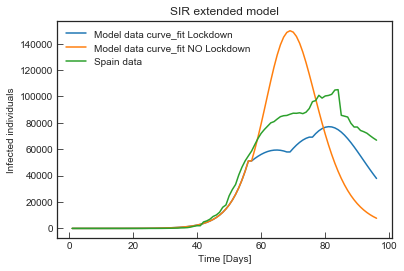

In [36]:
#Results
day_lockdown1 = 43+13 #+latent+waiting time
day_lockdown2 = 55+13
day_lockdown3 = 62+13

SIR_conf_results = odeint(SIR_conf,[S0,1,0],dt[:day_lockdown1],args = (r_value,q_value))
S_conf, I_conf, R_conf = SIR_conf_results.T

SIR_lockdown1 = odeint(SIR_conf,[S_conf[-1], I_conf[-1], R_conf[-1]],dt[day_lockdown1:day_lockdown2],
                       args = (r_after1, q_value))
S_lock1, I_lock1, R_lock1 = SIR_lockdown1.T

I_conf_lockdown=list(I_conf)
I_conf_lockdown.extend(I_lock1)

SIR_lockdown2 = odeint(SIR_conf,[S_lock1[-1], I_lock1[-1], R_lock1[-1]],dt[day_lockdown2:day_lockdown3],
                       args = (r_after2, q_value))
S_lock2, I_lock2, R_lock2 = SIR_lockdown2.T

I_conf_lockdown.extend(I_lock2)

SIR_lockdown3 = odeint(SIR_conf,[S_lock2[-1], I_lock2[-1], R_lock2[-1]],dt[day_lockdown3:],
                       args = (r_after3, q_value))
S_lock3, I_lock3, R_lock3 = SIR_lockdown3.T

I_conf_lockdown.extend(I_lock3)

SIR_no_lockdown = odeint(SIR_conf,[S_conf[-1], I_conf[-1], R_conf[-1]],dt[day_lockdown1:],args = (r_value, q_value))
S_no_lock, I_no_lock, R_no_lock = SIR_no_lockdown.T
I_conf_no_lock=list(I_conf)
I_conf_no_lock.extend(I_no_lock)

plt.figure(1)
plt.plot(dt,I_conf_lockdown,label='Model data curve_fit Lockdown')
plt.plot(dt,I_conf_no_lock,label='Model data curve_fit NO Lockdown')
plt.plot(dt,infected,label='Spain data')


plt.xlabel('Time [Days]')
plt.ylabel('Infected individuals')
plt.title('SIR extended model')
plt.legend(loc='best')
plt.show()